In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('datasets/US_graduates/US_graduates.csv')
df.head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999.0,0.0,160585.73,51000.0,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999.0,9000.0,126176.52,56000.0,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999.0,8000.0,148872.00,60000.0,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999.0,10000.0,129070.55,50000.0,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999.0,0.0,134299.53,49000.0,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


Hypothesis: Job satisfaction between those pursuing lower paid jobs vs higer paid jobs must be different

Employment Status Counts by Major:
Education.Major
Biological Sciences     1
Chemical Engineering    1
Computer Science        1
Humanities              1
Social Sciences         1
Engineering             1
Arts                    1
Mathematics             1
Psychology              1
Education               1
Name: count, dtype: int64

Mean Job Satisfaction by Major:
        Education.Major  Job.Satisfaction
0                  Arts               4.0
1   Biological Sciences               8.0
2  Chemical Engineering               9.0
3      Computer Science               7.0
4             Education               5.0
5           Engineering               8.0
6            Humanities               5.0
7           Mathematics               7.0
8            Psychology               6.0
9       Social Sciences               6.0


C:\Users\athar\AppData\Local\Temp\ipykernel_23548\606328024.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_satisfaction, x='Education.Major', y='Job.Satisfaction', palette='viridis')


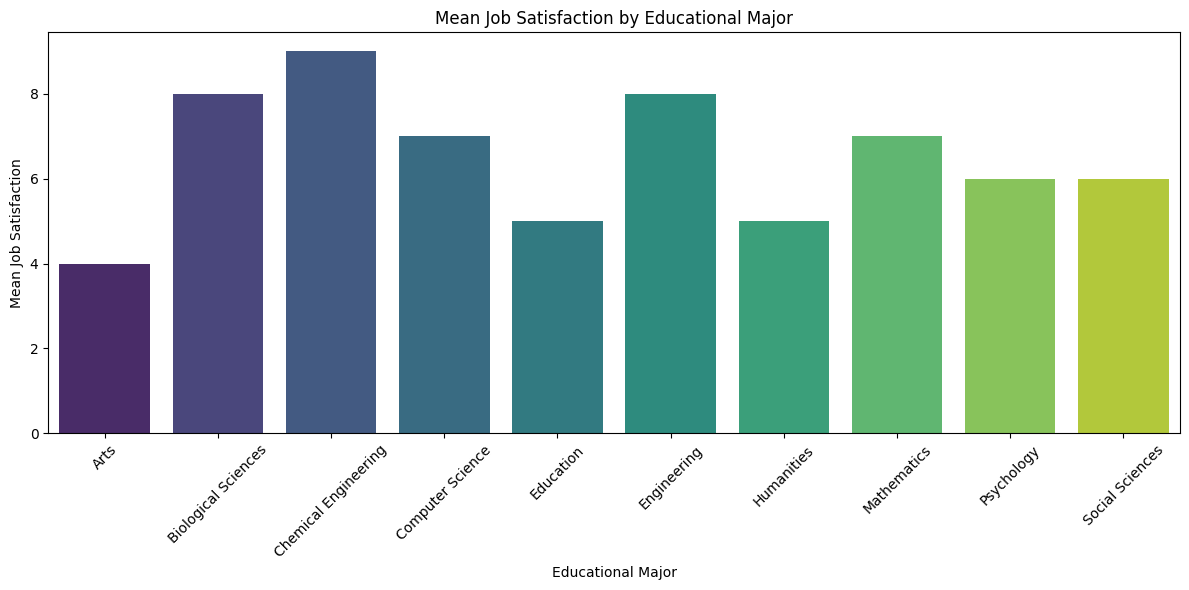


ANOVA Results:
F-statistic: nan, p-value: nan
There is no statistically significant difference in job satisfaction among different educational majors.


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\athar\AppData\Local\Temp\ipykernel_23548\606328024.py:32: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_results = stats.f_oneway(*[group["Job.Satisfaction"].values for name, group in df.groupby("Education.Major")])


In [4]:

data = {
    'Education.Major': ['Biological Sciences', 'Chemical Engineering', 'Computer Science', 'Humanities', 
                        'Social Sciences', 'Engineering', 'Arts', 'Mathematics', 'Psychology', 'Education'],
    'Employment.Status': ['Employed', 'Employed', 'Unemployed', 'Employed', 
                          'Employed', 'Employed', 'Unemployed', 'Employed', 'Employed', 'Unemployed'],
    'Job.Satisfaction': [8, 9, 7, 5, 6, 8, 4, 7, 6, 5]
}

df = pd.DataFrame(data)

# Check if all majors have employment status
employment_counts = df['Education.Major'].value_counts()
print("Employment Status Counts by Major:")
print(employment_counts)

# Calculate mean job satisfaction by major
mean_satisfaction = df.groupby('Education.Major')['Job.Satisfaction'].mean().reset_index()
print("\nMean Job Satisfaction by Major:")
print(mean_satisfaction)

# Plotting job satisfaction by major
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_satisfaction, x='Education.Major', y='Job.Satisfaction', palette='viridis')
plt.title('Mean Job Satisfaction by Educational Major')
plt.xticks(rotation=45)
plt.ylabel('Mean Job Satisfaction')
plt.xlabel('Educational Major')
plt.tight_layout()
plt.show()

# Statistical analysis: ANOVA to test if there's a significant difference in job satisfaction across majors
anova_results = stats.f_oneway(*[group["Job.Satisfaction"].values for name, group in df.groupby("Education.Major")])
print("\nANOVA Results:")
print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference in job satisfaction among different educational majors.")
else:
    print("There is no statistically significant difference in job satisfaction among different educational majors.")

No significance difference between jobs by different majors

Hypothesis:There is no significant difference in average salaries and employment rates among different educational majors.

In [6]:
df = pd.read_csv('datasets/US_graduates/US_graduates.csv')

C:\Users\athar\AppData\Local\Temp\ipykernel_23548\1349497282.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Education.Major', y='average_salary', palette='viridis', label='Average Salary')


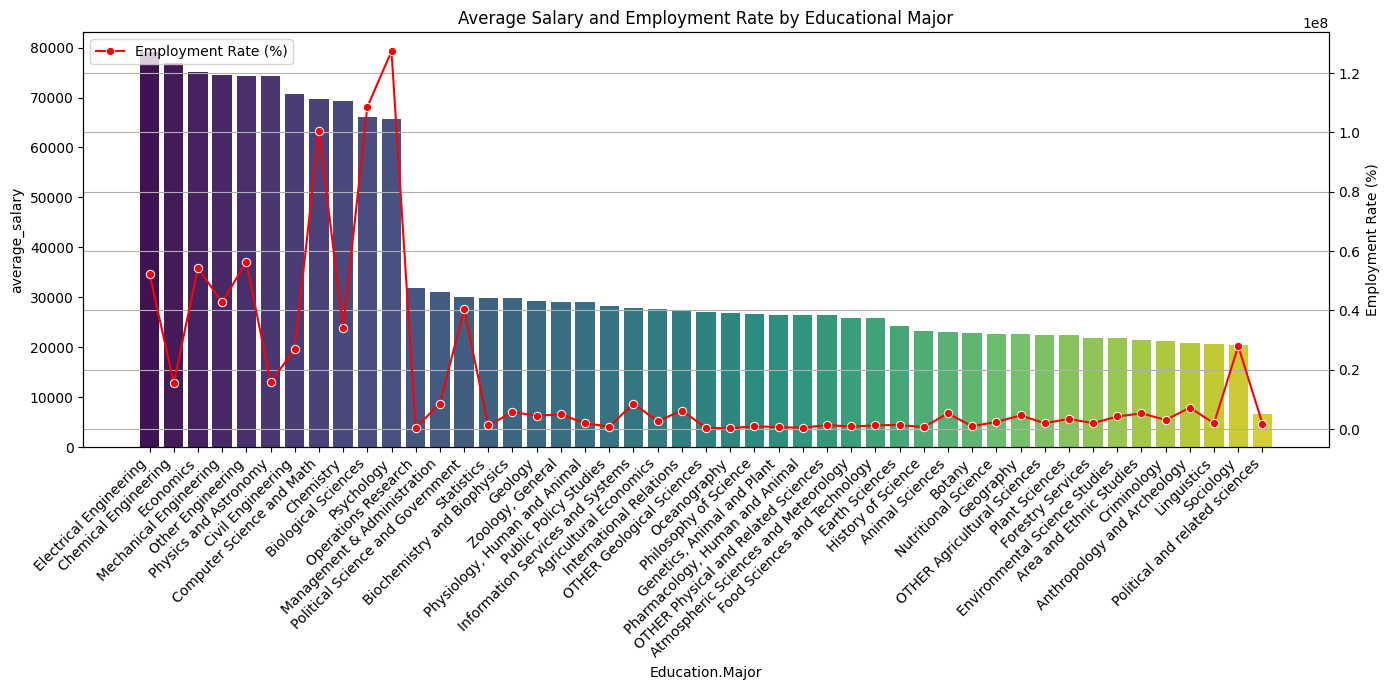

                         Education.Major  average_salary  employment_rate
15                Electrical Engineering    79097.928182     5.227798e+07
8                   Chemical Engineering    76814.402727     1.553845e+07
14                             Economics    75096.274545     5.429223e+07
27                Mechanical Engineering    74551.455455     4.273211e+07
34                     Other Engineering    74370.290909     5.639975e+07
37                 Physics and Astronomy    74346.052727     1.581191e+07
10                     Civil Engineering    70617.574545     2.693545e+07
11             Computer Science and Math    69659.744545     1.005764e+08
9                              Chemistry    69368.358182     3.401885e+07
6                    Biological Sciences    66046.293636     1.085640e+08
42                            Psychology    65744.451818     1.273892e+08
33                   Operations Research    31815.028182     4.608182e+05
26           Management & Administrati

In [7]:

# Strip spaces from column names
df.columns = df.columns.str.strip()

# First, we will clean the data by checking for missing values in relevant columns
df_cleaned = df[['Education.Major', 'Employment.Status.Employed', 'Salaries.Mean']].dropna()

# Ensure 'Employment.Status.Employed' is treated as binary (1 for employed, 0 for not)
df_cleaned['Employment.Status.Employed'] = df_cleaned['Employment.Status.Employed'].astype(int)

# Group by Education Major and calculate average salary and employment rate
summary = df_cleaned.groupby('Education.Major').agg(
    average_salary=('Salaries.Mean', 'mean'),
    employment_rate=('Employment.Status.Employed', 'mean')
).reset_index()

# Calculate employment rate as a percentage
summary['employment_rate'] *= 100  # Convert to percentage

# Sort values for better visualization
summary = summary.sort_values(by='average_salary', ascending=False)

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Create a bar plot for average salary
sns.barplot(data=summary, x='Education.Major', y='average_salary', palette='viridis', label='Average Salary')
plt.xticks(rotation=45, ha='right')

# Create a secondary y-axis for employment rate
ax2 = plt.gca().twinx()
sns.lineplot(data=summary, x='Education.Major', y='employment_rate', color='red', marker='o', label='Employment Rate (%)', ax=ax2)

# Add labels and title
plt.title('Average Salary and Employment Rate by Educational Major')
plt.xlabel('Educational Major')
plt.ylabel('Average Salary ($)')
ax2.set_ylabel('Employment Rate (%)')

# Adding a legend
plt.legend(loc='upper left')
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

# Display the summary DataFrame
print(summary)


There is quite a bit of difference in average salaries by major